# First steps

In [102]:
from retentioneering import init_config
import pandas as pd

Firstly, we need to initialize our config file

In [104]:
init_config(
    experiments_folder='experiments', # folder for saving experiment results: graph visualization, heatmaps and etc.
    index_col='user_pseudo_id', # column by which we split users / sessions / whatever
    event_col='event_name', # column that describes event
    event_time_col='event_timestamp', # column that describes timestamp of event
    
    positive_target_event='passed', # name of positive target event
    negative_target_event='lost', # name of negative target event
    pos_target_definition={ # how to define positive event, e.g. empty means that add passed for whom was not 'lost'

    },
    neg_target_definition={ # how to define negative event, e.g. users who were inactive for 600 seconds.
#        'time_limit': 600
    },
#     neg_target_definition={ # you also can define target event as list of other events
#         'event_list': ['lost']
#     }
)

/Users/anatolyzaytsev/retentioneering-draft/retentioneering/core/utils.py:53: UserWarning: registration of accessor <class 'retentioneering.core.utils.init_config.<locals>.RetentioneeringTrajectory'> under name 'trajectory' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  class RetentioneeringTrajectory(BaseTrajectory):
/Users/anatolyzaytsev/retentioneering-draft/retentioneering/core/utils.py:60: UserWarning: registration of accessor <class 'retentioneering.core.utils.init_config.<locals>.RetentioneeringDataset'> under name 'retention' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  class RetentioneeringDataset(BaseDataset):


We need to create instance of pandas DataFrame with our data.

In [105]:
#data = pd.read_csv('data/train.csv')
data = pd.read_csv('clicks.csv')
data = data.sort_values('event_timestamp')
data = data.retention.prepare()

In [106]:
len(data.retention.get_positive_users())

700

In [107]:
len(data)

12100

In [108]:
data.head()

,Unnamed: 0,user_pseudo_id,event_timestamp,event_name,user_type
0,0,776904929874,1970-01-01,onboarding_welcome_screen,0
1,0,617500537698,1970-01-01,onboarding_welcome_screen,0
2,0,178157108322,1970-01-01,onboarding_welcome_screen,0
3,0,777042659640,1970-01-01,onboarding_welcome_screen,0
4,0,372445246533,1970-01-01,onboarding_welcome_screen,0


In [109]:
data.event_name.unique()

array(['onboarding_welcome_screen', 'sleep_1',
       'onboarding_otherLogin__show', 'sleep_2', 'sleep_0', 'passed',
       'lost'], dtype=object)

In [110]:
edgelist = data.retention.get_edgelist()
edgelist.head()

,event_name,next_event,event_count
0,onboarding_otherLogin__show,sleep_1,0.99750
1,onboarding_otherLogin__show,sleep_2,0.01125
2,onboarding_welcome_screen,lost,0.12500
3,onboarding_welcome_screen,sleep_0,0.44625
4,onboarding_welcome_screen,sleep_1,5.52125


You can use any columns as edge source and target using `cols` param, by default it is equal to list of `event_col` and automatically created `next_event` (shift of it) is used.

Also you can use any column and any aggregation e.g.
one can calculate number of unique users, who passed through edge via next chunk

In [111]:
data.head()

,Unnamed: 0,user_pseudo_id,event_timestamp,event_name,user_type,next_event,next_timestamp
516,0,1612590753,1970-01-01 00:00:00.000000000,onboarding_welcome_screen,2,sleep_1,1970-01-01 00:00:00.000000002
1034,1,1612590753,1970-01-01 00:00:00.000000002,sleep_1,2,onboarding_otherLogin__show,1970-01-01 00:00:00.000000002
1035,2,1612590753,1970-01-01 00:00:00.000000002,onboarding_otherLogin__show,2,sleep_1,1970-01-01 00:00:00.000000027
5383,3,1612590753,1970-01-01 00:00:00.000000027,sleep_1,2,onboarding_welcome_screen,1970-01-01 00:00:00.000000027
5384,4,1612590753,1970-01-01 00:00:00.000000027,onboarding_welcome_screen,2,sleep_1,1970-01-01 00:00:00.000000033


In [112]:
edgelist = data.retention.get_edgelist(edge_col='user_pseudo_id', edge_attributes='users_nunique', norm=False)
edgelist.sort_values('users_nunique', ascending=False).head()

,event_name,next_event,users_nunique
4,onboarding_welcome_screen,sleep_1,800
9,sleep_1,onboarding_welcome_screen,800
8,sleep_1,onboarding_otherLogin__show,787
0,onboarding_otherLogin__show,sleep_1,786
10,sleep_1,passed,459


or adjacency matrix

In [113]:
data.retention.get_adjacency()

,onboarding_otherLogin__show,sleep_1,sleep_2,onboarding_welcome_screen,lost,sleep_0,passed
onboarding_otherLogin__show,0.00,1.00,0.01,0.00,0.00,0.00,0.00
sleep_1,1.00,0.00,0.00,4.95,0.00,0.00,0.57
sleep_2,0.01,0.00,0.00,0.02,0.00,0.00,0.00
onboarding_welcome_screen,0.00,5.52,0.02,0.00,0.12,0.45,0.00
lost,0.00,0.00,0.00,0.00,0.00,0.00,0.00
sleep_0,0.00,0.00,0.00,0.14,0.00,0.00,0.30
passed,0.00,0.00,0.00,0.00,0.00,0.00,0.00


All similar parameters work for adjacency matrix calculation.

In [114]:
data.retention.get_adjacency(edge_col='user_pseudo_id', edge_attributes='users_nunique', norm=False)

,onboarding_otherLogin__show,sleep_1,sleep_2,onboarding_welcome_screen,lost,sleep_0,passed
onboarding_otherLogin__show,0.0,786.0,9.0,0.0,0.0,0.0,0.0
sleep_1,787.0,0.0,0.0,800.0,0.0,0.0,459.0
sleep_2,8.0,0.0,0.0,20.0,0.0,0.0,0.0
onboarding_welcome_screen,0.0,800.0,19.0,0.0,100.0,330.0,0.0
lost,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sleep_0,0.0,0.0,0.0,111.0,0.0,0.0,241.0
passed,0.0,0.0,0.0,0.0,0.0,0.0,0.0


or we can simply visualize graph.

By default weight in visualization is equal to rate of unique users, who pass the edge,
you can change it to rate of all event occasions by turning `user_based` equal `False`.

In [115]:
data.retention.plot_graph(thresh=0.05, width=800, height=800)

/anaconda3/lib/python3.7/site-packages/networkx/drawing/layout.py:923: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


If you change node positions and want to save resulting layout, you can click on donwload button and load it to graph visualizer as follows.

In [116]:
data.retention.plot_graph(layout_dump='node_params.json', width=800, height=800)

FileNotFoundError: [Errno 2] No such file or directory: 'node_params.json'

Also you can use other data columns and aggregation functions from `retention.get_edgelist()` method (be sure that in this case `user_based=False`).

For example, we can visualize mean time between events.

Firtly, we should add column with time difference between event timestamps.

In [117]:
data.retention.get_edgelist()

,event_name,next_event,event_count
0,onboarding_otherLogin__show,sleep_1,0.99750
1,onboarding_otherLogin__show,sleep_2,0.01125
2,onboarding_welcome_screen,lost,0.12500
3,onboarding_welcome_screen,sleep_0,0.44625
4,onboarding_welcome_screen,sleep_1,5.52125
5,onboarding_welcome_screen,sleep_2,0.02375
6,sleep_0,onboarding_welcome_screen,0.14500
7,sleep_0,passed,0.30125
8,sleep_1,onboarding_otherLogin__show,0.99875
9,sleep_1,onboarding_welcome_screen,4.94625


In [122]:
data.retention.plot_graph(user_based=False, edge_col='seconds_between_events', edge_attributes='time_mean', thresh=0.01, width=800, height=800, show_percent=False)

DataError: No numeric types to aggregate

In [123]:
data['seconds_between_events'] = (data.next_timestamp - data.event_timestamp) * 1e-9
# use show_percent=False to visualize absolute value


# Temporal funnel

Let's plot the temporal funnel. Rows correspond to different events and columns correspond to step number in the user trajectory, value corresponds to fraction of all users who had corresponding event at corresponding step. For example, you can see that all users in the analysis start from "welcome_screen" (step 1) and end ended up passed (~0.6) or lost (~0.4) after 24 steps

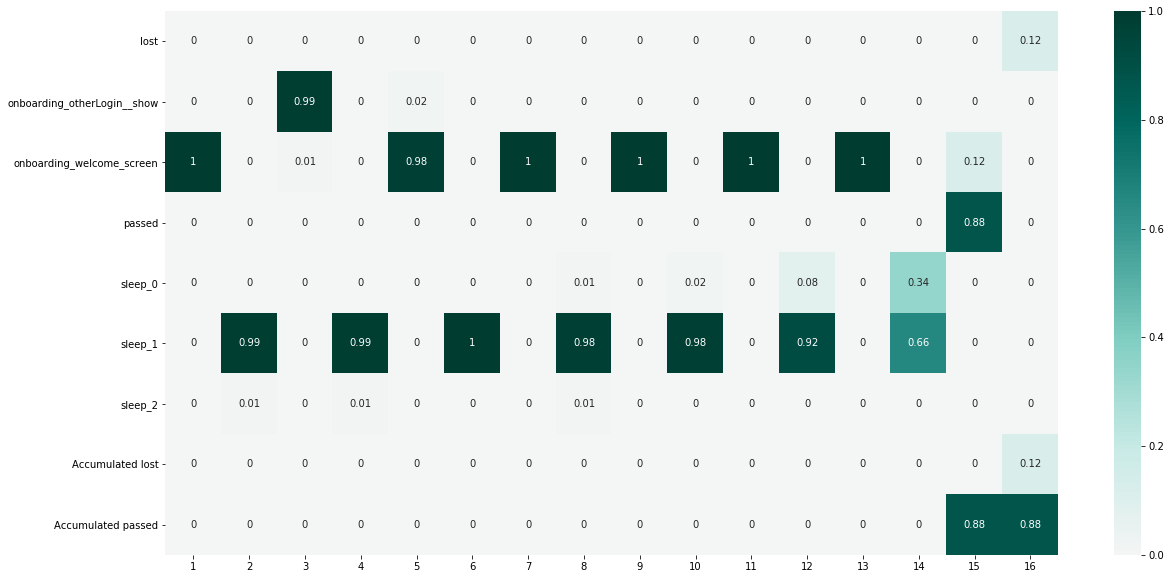

In [124]:
desc_table = data.retention.get_step_matrix(max_steps=30)

And we can calculate temporal funnel difference between two groups

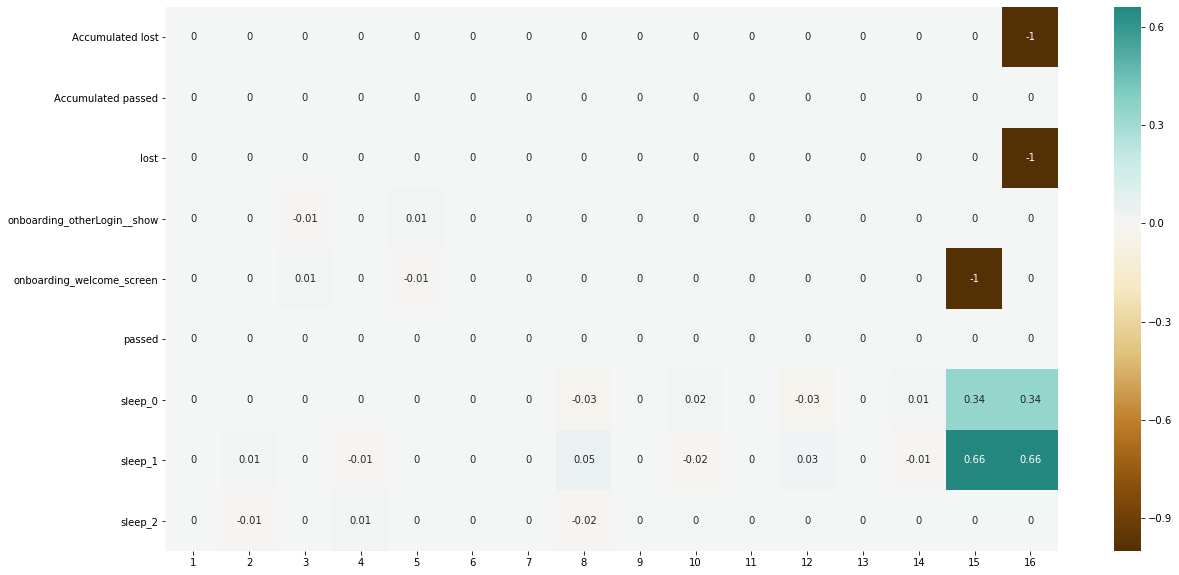

In [125]:
# create group filter based on target events
diff_filter = data.retention.create_filter()

# calculate difference table between two groups
diff_table = data.retention.get_step_matrix_difference(diff_filter, max_steps=30)

# Clustering

We can use clustering with different visualizations

Clutermap allows to see how important different events are for clustering.
For example we can see that `onboarding_welcome_screen` is always equal, so it does not affect clustering, but `onboarding_chooseLoginType` varies accross users and creates some clusters.

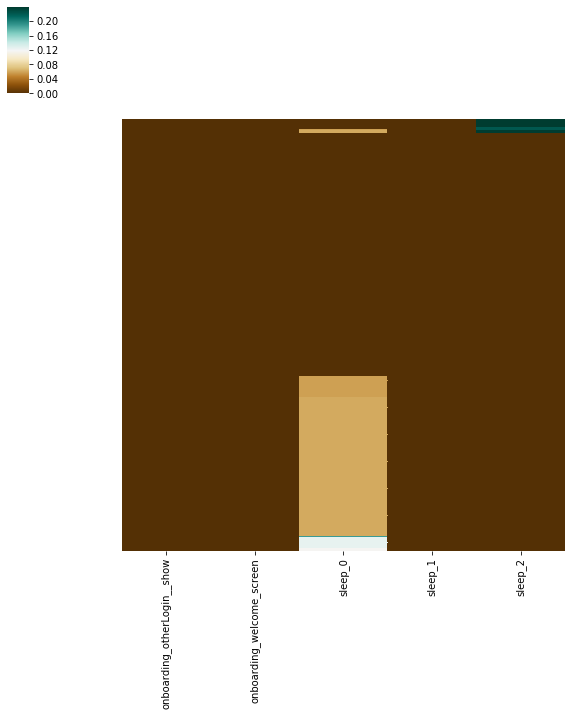

In [126]:
data.retention.get_clusters(plot_type='cluster_heatmap');

Then it will be useful to visualize projection of user trajectories to understand how many clusters we have.

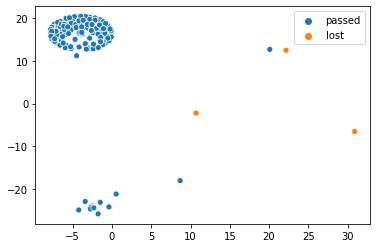

In [127]:
data.retention.learn_tsne(plot_type='targets');

We can see that projection is poor, so it will be good to tune it. To update TSNE weights we need to set `refit` parameter to `True`.

Any parameter from `sklearn.manifold.TSNE` can be used, e.g. `perplexity` can help to obtain better visualization.

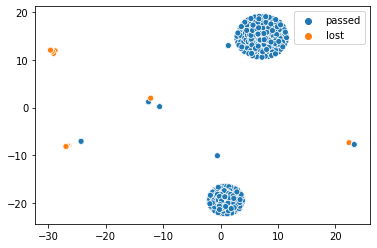

In [128]:
data.retention.learn_tsne(perplexity=10, plot_type='targets', refit=True);

Now we can see two dense cirle clusters.

Any parameters from `sklearn.cluster.KMeans` can be used.

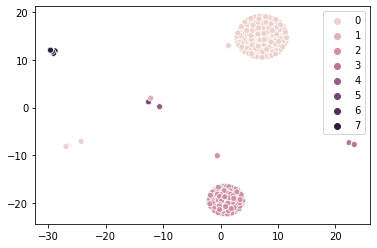

In [129]:
data.retention.get_clusters(n_clusters=8, plot_type='cluster_tsne', refit_cluster=True);

We do not use target events in clustering, so we can compare different groups in terms of what target event is likely to occur in them.

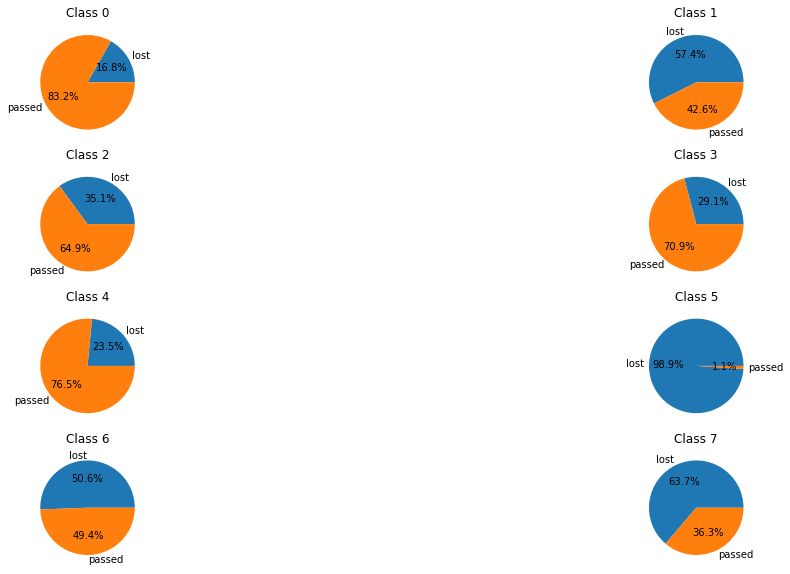

In [40]:
data.retention.get_clusters(plot_type='cluster_pie');

We can see that clusters `0` and `1` are pretty interesting, so we can visualize graph for them.

In [50]:
(data
 .retention
 .filter_cluster(0)
 .retention
 .plot_graph(width=800, height=800))

/anaconda3/lib/python3.7/site-packages/networkx/drawing/layout.py:923: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


In [42]:
(data
 .retention
 .filter_cluster(1)
 .retention
 .plot_graph(width=800, height=800))

In [46]:
(data
 .retention
 .filter_cluster(4)
 .retention
 .plot_graph(width=800, height=800))

In [43]:
(data
 .retention
 .filter_cluster(5)
 .retention
 .plot_graph(width=800, height=800))

In [45]:
(data
 .retention
 .filter_cluster(7)
 .retention
 .plot_graph(width=800, height=800))

# Supervised classifier

Supervised learning is usually better then clustering.

In [25]:
model = data.retention.create_model()

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


To understand what features are meaningful, we can visualize graph of weights.

Larger the node or edge, larger its effect on probability of target event.
Green nodes mean positive effect, red nodes -- negative.

In [26]:
features = data.retention.extract_features(ngram_range=(1,2))
target = features.index.isin(data.retention.get_positive_users())

In [27]:
model.permutation_importance(features, target, thresh=0.)


            ROC-AUC: 0.9124591164734438
            PR-AUC: 0.8975341600045529
            Accuracy: 0.8849514563106796
            


/Users/anatolyzaytsev/.local/lib/python3.7/site-packages/retentioneering-0.4.1-py3.7.egg/retentioneering/visualization/plot.py:291: RuntimeWarning: divide by zero encountered in log1p
  "weight": np.log1p(row.weight_norm) * 1.5,


You can use any different model with sklearn-api (ont only sklearn package has it e.g. `lightgm` can be used too).

And pass params to it.

In [28]:
from sklearn.ensemble import RandomForestClassifier
model = data.retention.create_model(RandomForestClassifier, n_estimators=25)

In [29]:
features = data.retention.extract_features(ngram_range=(1,2))
target = features.index.isin(data.retention.get_positive_users())

In [30]:
model.permutation_importance(features, target, thresh=0.)


            ROC-AUC: 0.9592964985907655
            PR-AUC: 0.9456069017198432
            Accuracy: 0.9269417475728156
            
